In [5]:
import pandas as pd
import numpy as np

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.datasets import make_moons, load_iris, load_diabetes

import matplotlib.pyplot as plt

import joblib
import torch

In [7]:
from sklearn.metrics import accuracy_score, r2_score
from sklearn.neighbors import KNeighborsClassifier

In [38]:
def train_test_plot(X_train, y_train, X_test, y_test, title1="Train", title2="Test"):
    plt.figure(figsize=(16, 7))

    ax = plt.subplot(121)
    plt.title(title1)
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$")
    _ = plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap="Set3", ec='black', alpha=0.85, lw=0.5)

    plt.subplot(122, sharex=ax, sharey=ax)
    plt.title(title2)
    plt.xlabel("$x_1$")
    # Если классификатор предсказал вероятность принадлежности первому классу >= 0.5, считаем объект принадлежащим классу 1
    # в противном случае - 0
    _ = plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap="Set3", ec='black', alpha=0.85, lw=0.5)

def plot_decision_boundary_standart(model, X, y):

    margin_x1 = (X[:, 0].max() - X[:, 0].min()) * 0.1
    margin_x2 = (X[:, 1].max() - X[:, 1].min()) * 0.1

    x_min, x_max = X[:, 0].min() - margin_x1, X[:, 0].max() + margin_x1
    y_min, y_max = X[:, 1].min() - margin_x2, X[:, 1].max() + margin_x2
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 501), np.linspace(y_min, y_max, 501))

    X_to_pred_on = torch.from_numpy(np.column_stack((xx.ravel(), yy.ravel()))).float()

    y_pred = model.predict(X_to_pred_on)

    # Reshape preds and plot
    y_pred = y_pred.reshape(xx.shape)
    plt.contourf(xx, yy, y_pred, cmap="Set3", alpha=0.5)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap="Set3", ec='black', alpha=1, lw=0.5)

    plt.xlabel("$x_0$")
    plt.ylabel("$x_1$")

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

def plot_decision_boundary_net(model: torch.nn.Module, X: torch.Tensor, y: torch.Tensor):
    """Plots decision boundaries of model predicting on X in comparison to y."""
    model.to("cpu")
    X, y = X.to("cpu"), y.to("cpu")

    margin_x1 = (X[:, 0].max() - X[:, 0].min()) * 0.1
    margin_x2 = (X[:, 1].max() - X[:, 1].min()) * 0.1

    x_min, x_max = X[:, 0].min() - margin_x1, X[:, 0].max() + margin_x1
    y_min, y_max = X[:, 1].min() - margin_x2, X[:, 1].max() + margin_x2
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 501), np.linspace(y_min, y_max, 501))

    X_to_pred_on = torch.from_numpy(np.column_stack((xx.ravel(), yy.ravel()))).float()

    model.eval()
    with torch.inference_mode():
        y_logits = model(X_to_pred_on)

    if len(torch.unique(y)) > 2:
        y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)
    else:
        y_pred = torch.round(torch.sigmoid(y_logits))

    # Reshape preds and plot
    y_pred = y_pred.reshape(xx.shape).detach().numpy()
    plt.contourf(xx, yy, y_pred, cmap="Set3", alpha=0.5)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap="Set3", ec='black', alpha=1, lw=0.5)

    plt.xlabel("$x_0$")
    plt.ylabel("$x_1$")

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

def train_test_model_plot(model, X_train, y_train, X_test, y_test, net=False):
    plt.figure(figsize=(16, 7))

    plt.subplot(1, 2, 1)
    plt.title("Train")
    if net:
        plot_decision_boundary_net(model, X_train, y_train)
    else:
        plot_decision_boundary_standart(model, X_train, y_train)

    plt.subplot(1, 2, 2)
    plt.title("Test")
    if net:
        plot_decision_boundary_net(model, X_test, y_test)
    else:
        plot_decision_boundary_standart(model, X_test, y_test)

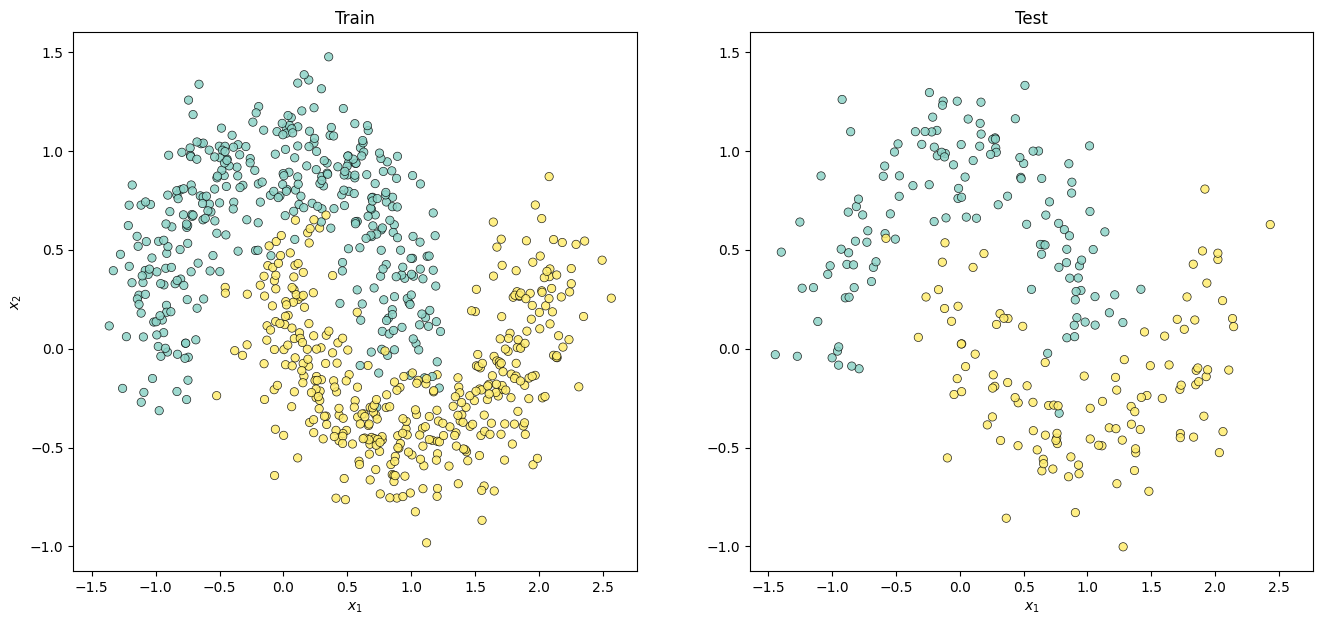

In [17]:
X, Y = make_moons(n_samples=1000, random_state=42, noise=0.2)
X = torch.Tensor(X)
Y = torch.Tensor(Y)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25)
train_test_plot(X_train, y_train, X_test, y_test)


In [22]:
knn_clf = KNeighborsClassifier(n_neighbors=11)
knn_clf.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=11)

In [23]:
knn_clf_predict = knn_clf.predict(X_test)
knn_clf_accuracy = accuracy_score(y_test, knn_clf_predict)
print(f"Accuracy: {knn_clf_accuracy * 100}%")

Accuracy: 98.4%


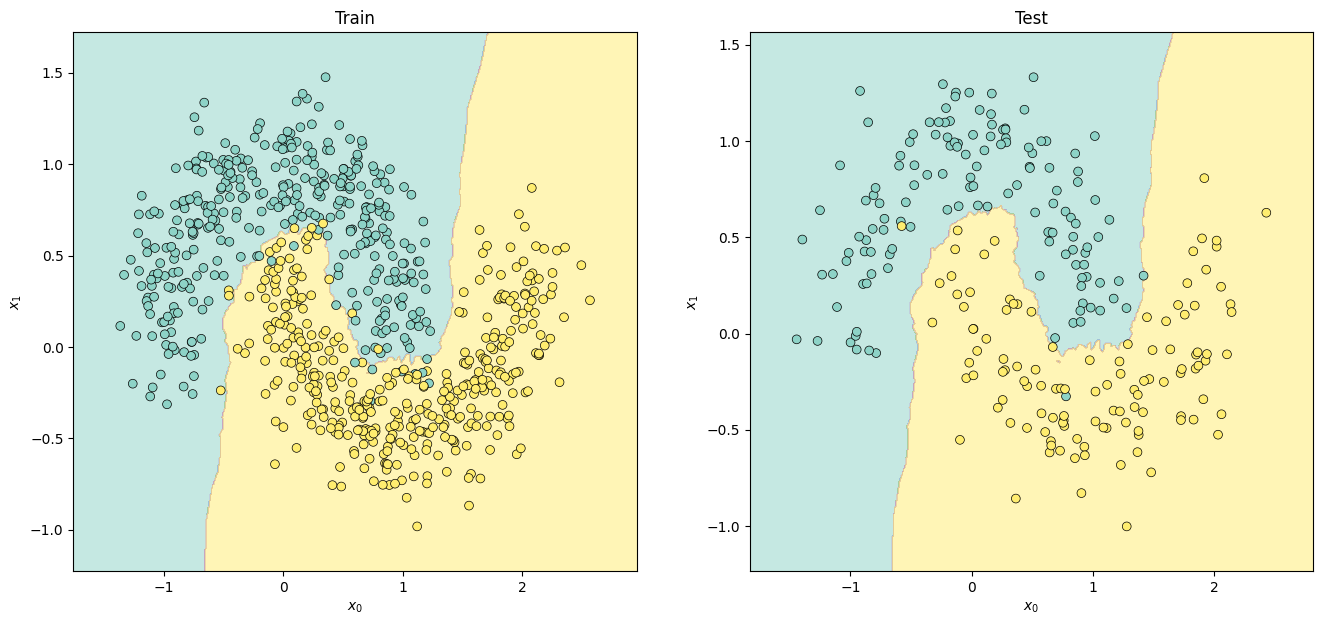

In [24]:
train_test_model_plot(knn_clf, X_train, y_train, X_test, y_test)

In [99]:
def get_spiral_data(N, D, K):
    X = np.zeros((N*K,D)) # data matrix (each row = single example)
    y = np.zeros(N*K, dtype='uint8') # class labels
    for j in range(K):
      ix = range(N*j,N*(j+1))
      r = np.linspace(0.0,1,N) # radius
      t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.6 # theta
      X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
      y[ix] = j
    return X, y

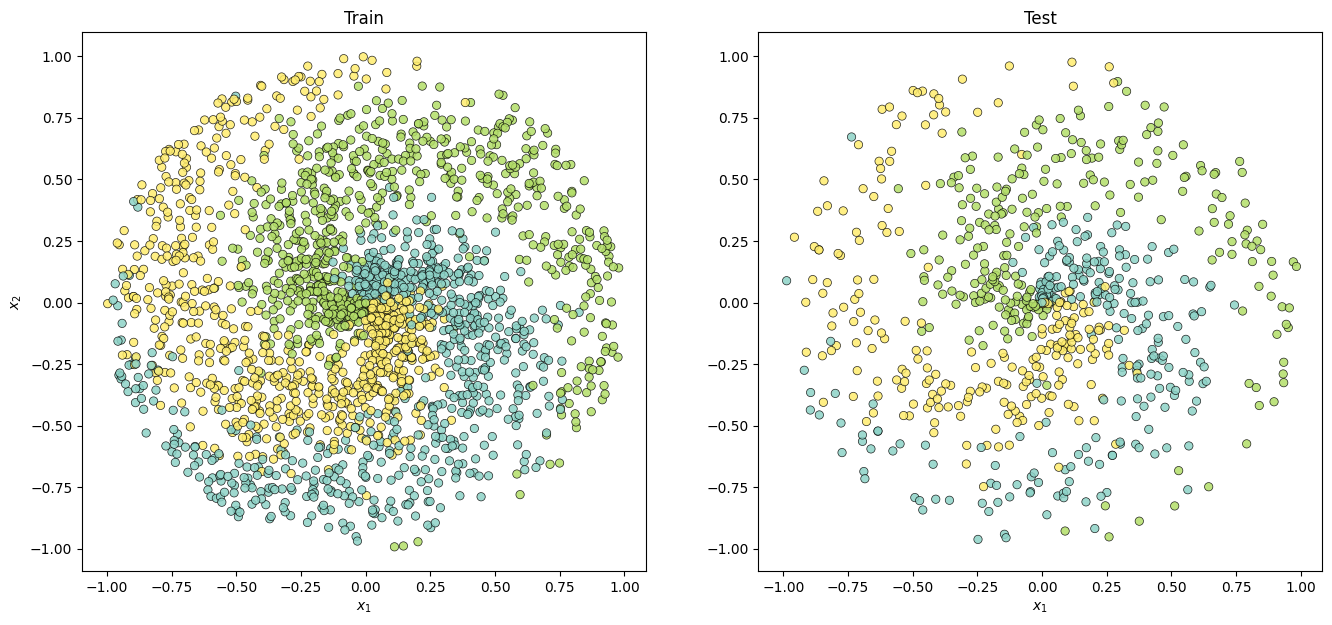

In [100]:
X, y = get_spiral_data(1000, 2, 3)
X = torch.Tensor(X)
y = torch.Tensor(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
train_test_plot(X_train, y_train, X_test, y_test)


In [101]:
clf_spiral = KNeighborsClassifier(n_neighbors=15)
clf_spiral.fit(X_train, y_train)
clf_spiral_predict = clf_spiral.predict(X_test)
clf_spiral_accuracy = accuracy_score(y_test, clf_spiral_predict)
print(f"Accuracy: {clf_spiral_accuracy * 100}%")

Accuracy: 90.93333333333334%


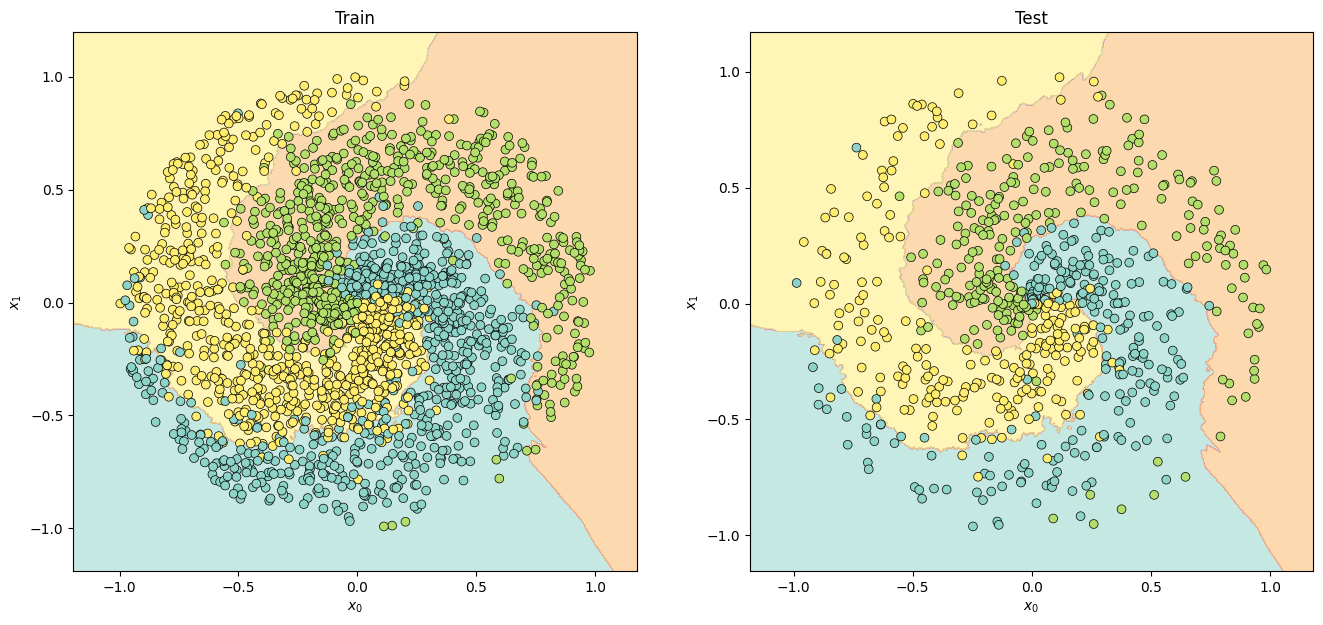

In [102]:
train_test_model_plot(clf_spiral, X_train, y_train, X_test, y_test)

In [62]:
class MulticlassModelNonLinear(torch.nn.Module):
    def __init__(self, input_features, output_features, hidden_units):
        super().__init__()
        self.fc1 = torch.nn.Linear(input_features, hidden_units)
        self.relu1 = torch.nn.ReLU()
        self.fc2 = torch.nn.Linear(hidden_units, hidden_units)
        self.relu2 = torch.nn.ReLU()
        self.fc3 = torch.nn.Linear(hidden_units, output_features)

    def forward(self, x):
        x = self.relu1(self.fc1(x))
        x = self.relu2(self.fc2(x))
        x = self.fc3(x)
        return x

    def predict(self, x):
        return torch.softmax(self.forward(x), dim=1).argmax(dim = 1)

In [103]:
y_d = torch.Tensor(pd.get_dummies(y_train).to_numpy())
y_d

tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        ...,
        [0., 1., 0.],
        [0., 0., 1.],
        [0., 0., 1.]])

In [127]:
net = MulticlassModelNonLinear(2, 3, 200)
loss_fun = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters(), lr=0.005)

In [80]:
def learn_multiclass(model, optimizer, n_epochs):
    for epoch in range(n_epochs):

        model.train()

        y_logits = model(X_train)
        y_pred = torch.softmax(y_logits, dim=1).argmax(dim = 1)

        loss = loss_fun(y_logits, y_d)


        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if epoch % 100 == 0:
            print(f"Epoch {epoch}: loss = {loss:.5f}")

In [128]:
learn_multiclass(net, optimizer, 1300)

Epoch 0: loss = 1.08712
Epoch 100: loss = 0.23491
Epoch 200: loss = 0.21540
Epoch 300: loss = 0.21161
Epoch 400: loss = 0.20187
Epoch 500: loss = 0.19544
Epoch 600: loss = 0.19221
Epoch 700: loss = 0.18691
Epoch 800: loss = 0.18850
Epoch 900: loss = 0.18431
Epoch 1000: loss = 0.18009
Epoch 1100: loss = 0.17854
Epoch 1200: loss = 0.17410


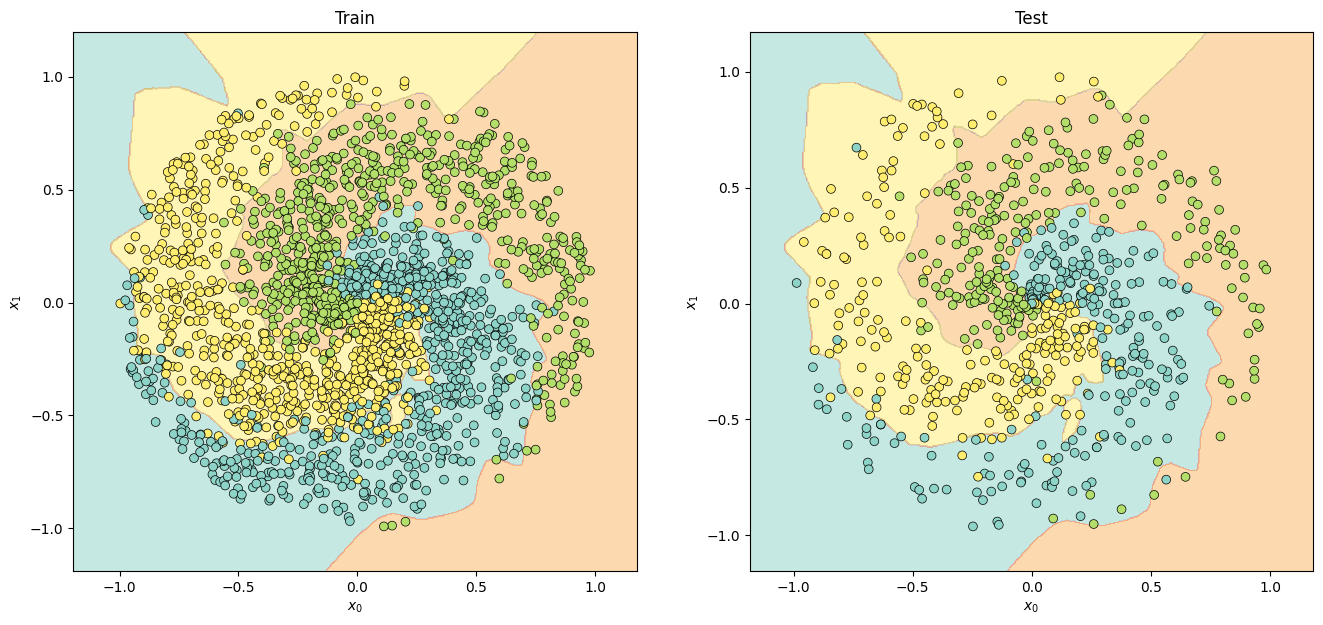

In [129]:
train_test_model_plot(net, X_train, y_train, X_test, y_test)

In [130]:
net_accuracy = accuracy_score(y_test, net.predict(X_test))
print(f"Net accuracy: {net_accuracy * 100}%")

Net accuracy: 91.73333333333333%
